# Mandlebrot set
This notebook details code or generation and zooming of Mandlebrot sets.

## Establish the problem
Take a complex number $Z = a + ib$, square it and add the original number to it. Repeating this can have two results:
- The series blows up to infinity (diverges).
- Stays bounded to the finite numbers.

$Z_{N+1} = Z^2 + c$

The Mandlebrot set is the set of values of c that stay bounded when starting at $Z_0 = 0$.

For the purposes of the computer we can treat complex number $Z=a + ib$ as cartesian coordinates $(x,y)$ with $x=a$ and $y=b$.

To test this, we calculate iterations of the various values of c. If they have not diverged after a large number of iterations (precision: 500 steps) then they are left blank (black).

In [1]:
from PIL import Image
import colorsys
import math
import os
import sys
from tqdm import tqdm
import time
from math import sqrt
from PIL import Image, ImageDraw
import datetime as dt

In [2]:
start = time.time()

In [3]:
# Set up image
width = 2000 #pixels
#width = 26135 # 2 hour high res run
x = -0.65  # shift for better centering
y = 0
xRange = 3.4
# xRange = 3
aspectRatio = 4/3
precision = 500     # max number of iterations to determine divergence

In [4]:
height = round(width / aspectRatio)
yRange = xRange / aspectRatio
minX = x - xRange / 2
maxX = x + xRange / 2
minY = y - yRange / 2
maxY = y + yRange / 2

img = Image.new('RGB', (width, height), color = 'black')
pixels = img.load()

print(f'Image resolution: {width * height:,} pixels.')

Image resolution: 3,000,000


In [21]:
print(f'X:[{minX} {maxX}] Y:[{minY:.2f}, {maxY:.2f}]')

X:[-1.7 1.7] Y:[-1.28, 1.28]


In [23]:
print(f'{xRange:.2f}')
print(f'{yRange:.2f}')

3.40
2.55


In [6]:
# Define colouring rules

def logColor(distance, base, const, scale):
    color = -1 * math.log(distance, base)
    rgb = colorsys.hsv_to_rgb(const + scale * color,0.8,0.9)
    return tuple(round(i * 255) for i in rgb)



def powerColor(distance, exp, const, scale):
    color = distance**exp
    rgb = colorsys.hsv_to_rgb(const + scale * color,1 - 0.6 * color,0.9)
    return tuple(round(i * 255) for i in rgb)

## Escape time algorithm
Find how many iterations are required to definitively diverge. This determines the colour of the given pixel.

In [7]:
# Initialize progress bar

progress_bar = tqdm(
    total=width * height, 
    unit="pixel", 
    bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]", 
    ncols=65  # Sets bar width 
)

for row in range(height):
    for col in range(width):
        x = minX + col * xRange / width
        y = maxY - row * yRange / height
        oldX = x
        oldY = y
        for i in range(precision + 1):
            a = x*x - y*y  # real component of z^2
            b = 2 * x * y  # imaginary component of z^2
            x = a + oldX  # real component of new z
            y = b + oldY  # imaginary component of new z
            if x*x + y*y > 4:
                break
            
        if i < precision:
            distance = (i + 1) / (precision + 1)
            rgb = powerColor(distance, 0.2, 0.27, 1.0)
            pixels[col, row] = rgb
        
        # Update progress bar
        progress_bar.update(1)

# Close the progress bar when done
progress_bar.close()

100%|█████████████████████████████| 3000000/3000000 [00:38<00:00]


In [8]:
# Get the current date and time in a suitable format
timestamp = dt.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

# need to add noise to this data
img.save(f'output_{timestamp}.png')
# os.system('open output.png')

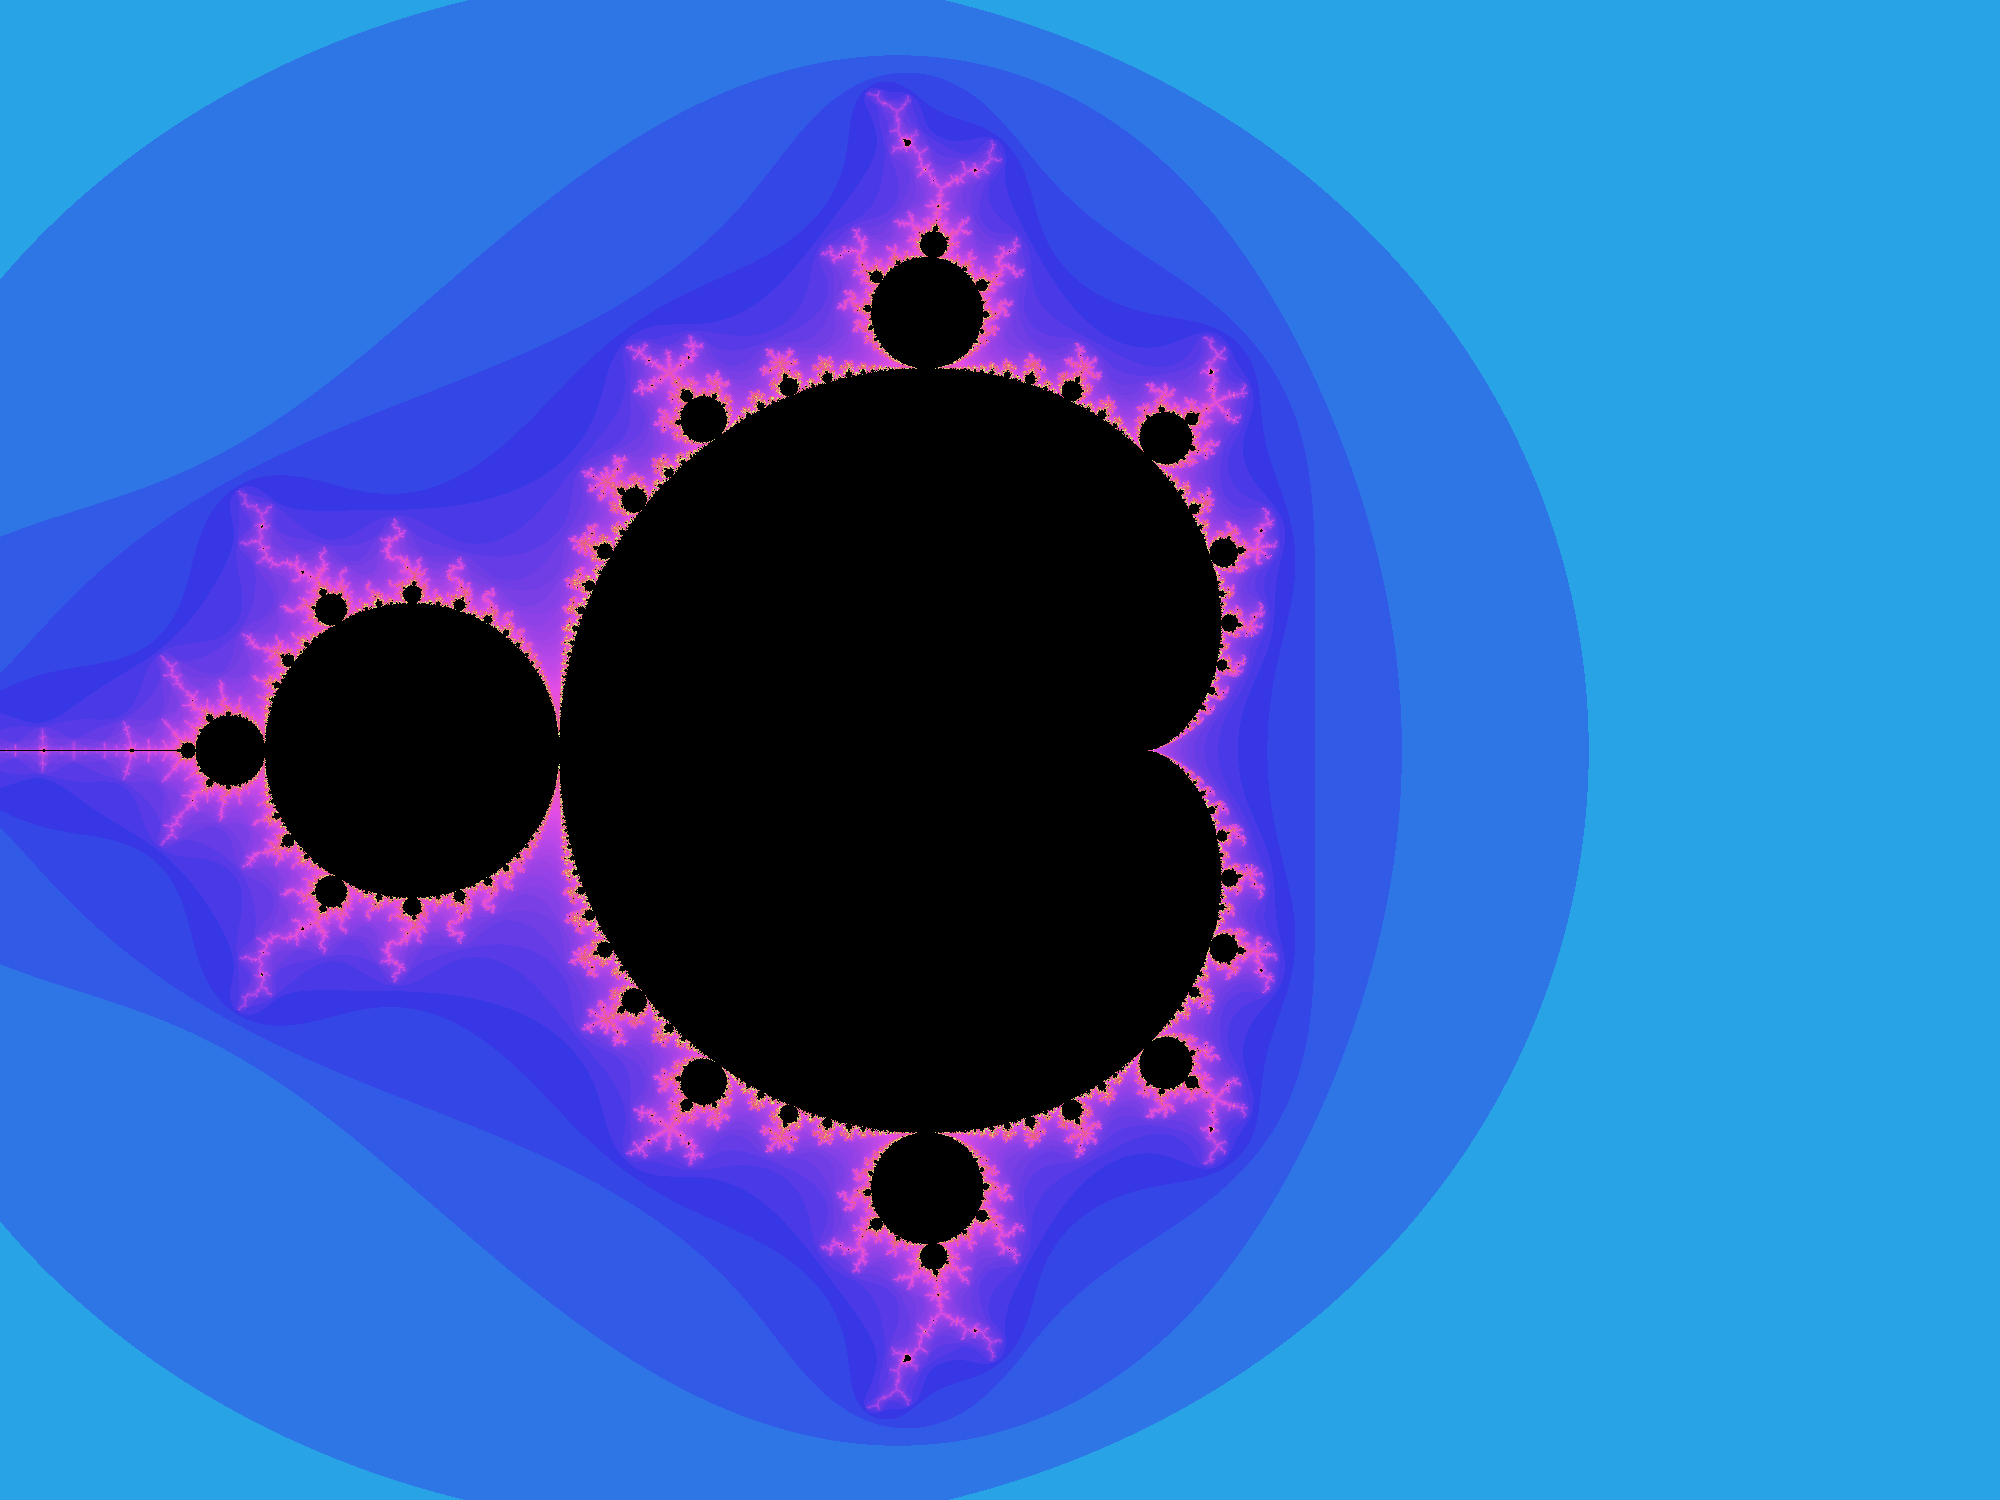

In [9]:
img

In [10]:
total_time = time.time() - start

hours, rem = divmod(total_time, 3600)
minutes, seconds = divmod(rem, 60)

print(f'Total time taken: {int(hours)}h {int(minutes)}m {seconds:.2f}s')

rate = (width * height) / total_time

print(f'Average rate: {rate:.2f} pixels/s')

Total time taken: 0h 0m 38.42s
Average rate: 78085.11 pixels/s


In [11]:
aim_time = 2 * 60 * 60 
aim_pixels = rate * aim_time
print(f'{aim_pixels:,}')

562,212,803.1944983


In [12]:
# A = 3/4 * x**2

x_aim = sqrt((4/3) * aim_pixels)
x_aim

27379.135686248348

In [13]:
# TODO: write the .py file into a callable function.
# Params:
# - c (initial values of (x,y))
# - image resolution/size
# - aspect ratio
# - colour rules
# - xRange

In [14]:
# TODO: Use parallel programming to accelerate/ parallelize code.
# Also create time complexity documentation - operates in O(n^2) where n is the width of the image 

In [15]:
# TODO: Create a log or txt file for image/ runs with parameter info and runtime information.